In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.inspection import inspect

In [4]:
#create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
#reflect an existing database into a new model

Base = automap_base()
Base.prepare(engine, reflect=True)
#reflect the tables


In [6]:
Base.classes.keys()

['measurement', 'station']

In [7]:
#view all of the classes that automap found

#base.classes.keys()

#engine.execute('SELECT * FROM measurement').fetchall()


# # View all of the classes that automap found
# engine.execute('SELECT * FROM station LIMIT 25').fetchall()


In [8]:
#view all of the classes that automap found
#engine.execute('SELECT * FROM station').fetchall()


In [9]:
#list of column names and type
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
#list of column names and type
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
#save references to each table
Measurement = Base.classes.measurement


In [12]:
#save references to each table
station = Base.classes.station

In [13]:
#create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [14]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [15]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [16]:
#earliest Date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01',)

In [17]:
#latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [18]:
#design a query to retrieve the last 12 months of precipitation data and plot the results. 
#starting from the most recent data point in the database. 
precipitation_m = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= '2016-08-23')\
.filter(Measurement.date<='2017-08-24').order_by(Measurement.date).all()
precipitation_m

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [19]:
#calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [20]:
# Perform a query to retrieve the data and precipitation scores
# precipitation_m
# data_prcp = [Measurement.date, Measurement.prcp]


# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
precipitation_m_df = pd.DataFrame(precipitation_m, columns=['date', 'precipitation'])
precipitation_m_df.set_index('date')
precipitation_m_df.sort_values(by=['date'])
precipitation_m_df.head()


,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


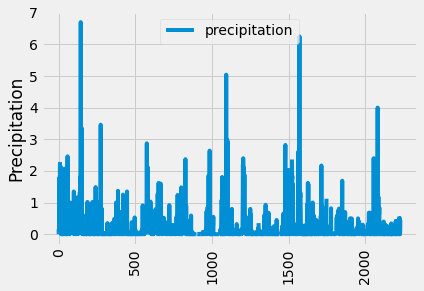

In [21]:


precipitation_m_df.plot(rot=90);
plt.ylabel('Precipitation')
plt.savefig
plt.show;


In [22]:
#use Pandas to calcualte the summary statistics for the precipitation data
precipitation_m_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [23]:
#calculate the total number of station
station_num = session.query(station.id).count()
station_num

9

In [24]:
#design a query to find the most active stations (i.e. what stations have the most rows?)
#list the stations and the counts in descending order.
active = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
#using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
.filter(Measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

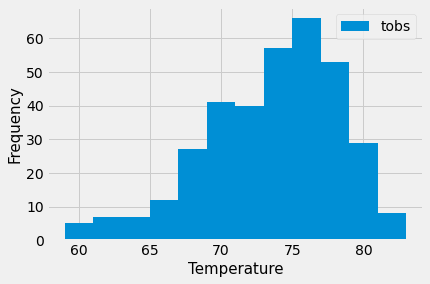

In [26]:
#using the most active station id
#query the last 12 months of temperature observation data for this station and plot the results as a histogram
results=session.query(Measurement.tobs).filter(Measurement.station=='USC00519281')\
.filter(Measurement.date>='2016-08-23').all()


df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.ylabel('Frequency', fontsize = 15)
plt.xlabel('Temperature', fontsize = 15)
plt.savefig
plt.show;


# Close session

In [27]:
# Close Session
session.close()